In [12]:
import os
import base64
import requests
import json


client_id = os.getenv("CLIENT_ID")
# client_secret = os.environ.get('CLIENT_SECRET')
# https://accounts.spotify.com/authorize?client_id=8879a6eab24f4834bc2b132380e37127&response_type=code&redirect_uri=http%3A%2F%2Flocalhost%3A3000&scope=user-follow-read user-follow-modify

In [13]:
print(client_id)

None


The function below get use the Access Token

In [1016]:
def get_token():
    auth_string = client_id + ":" + client_secret
    auth_bytes = auth_string.encode('utf-8')
    auth_base64 = str(base64.b64encode(auth_bytes),'utf-8')
    
    
    url = 'https://accounts.spotify.com/api/token'
    headers = {
    "Authorization": "Basic " + auth_base64,
    "Content-Type":"application/x-www-form-urlencoded"
    }
    
    data = {"grant_type": "client_credentials"}

    result = requests.post(url, headers=headers,data=data)

    json_result = json.loads(result.content)
    
    token = json_result['access_token']
    return token
    
    
def get_auth_header(token):
    return {"Authorization": "Bearer " + token}

The function below gets you the authorization token so you can have access to a user spotify account

In [925]:
def get_authorization():
    auth_string = client_id + ":" + client_secret
    auth_bytes = auth_string.encode('utf-8')
    auth_base64 = str(base64.b64encode(auth_bytes),'utf-8')
    
    
    url = 'https://accounts.spotify.com/api/token'
    headers = {
    "Authorization": "Basic " + auth_base64,
    "Content-Type":"application/x-www-form-urlencoded"
    }
    
    data = {"grant_type": "authorization_code",
           "code":"AQDnnkQuDsz5DjCmeDnPyaAO5Pm27s5cPHCfHPI_Cv0NWp9QPKpmCENlr4fcYJfnbQhZRRoirucBRtv9eB1cydBfous53R54S0zh2HCZSKVadheRYymRO50xGjzCtJXeNaJ7qM4Zh3xpk7BFOib-0ZXF1RpInszIA7s1dy5gsl27L6l3DyKKe8QTV6yFbskOzn9nMxv-rpe6EghLHTrJ",
           "redirect_uri":"http://localhost:3000"}

    result = requests.post(url, headers=headers,data=data)

    json_result = json.loads(result.content)
    
    token = json_result['access_token']
    return token


def get_auth_headerauth(authorized):
    return {"Authorization": "Bearer " + authorized}

In [1306]:
from requests.exceptions import ConnectionError

def get_track_analysis(token,ids):
    url = "https://api.spotify.com/v1/audio-analysis/"+ids
    header = get_auth_header(token)
    try:
        result = requests.get(url,headers=header)
    except ConnectionError as e:
        return "no response"
    else:
        json_result = json.loads(result.content)
        return json_result

def get_track(token,ids):
    url ="https://api.spotify.com/v1/tracks/"+ids
    header = get_auth_header(token)
    result = requests.get(url,headers=header)
    json_result = json.loads(result.content)
    return json_result

def get_albums(token,ids):
    url = "https://api.spotify.com/v1/albums/"+ids  
    header = get_auth_header(token)
    result = requests.get(url,headers=header)
    json_result = json.loads(result.content)
    return json_result

def get_following(authorized):
    url = "https://api.spotify.com/v1/me/following?type=artist&limit=50"
    header = get_auth_headerauth(authorized)
    result = requests.get(url,headers=header)
    json_result = json.loads(result.content)
    return json_result

def delete_following(authorized,ids):
#     url = "https://api.spotify.com/v1/me/following?type=artist&limit=50"
    url = "https://api.spotify.com/v1/me/following?type=artist&ids="+ids
    header = get_auth_headerauth(authorized)
    result = requests.delete(url,headers=header)
    return result


def follow(authorized,ids):
    url = "https://api.spotify.com/v1/me/following?type=artist&ids="+ids
    header = get_auth_headerauth(authorized)
    result = requests.put(url,headers=header)
    return result

def related_artist(token,ids):
    idss = ids
    url = "https://api.spotify.com/v1/artists/"+idss+"/related-artists"    
    header = get_auth_header(token)
    result = requests.get(url,headers=header)
    json_result = json.loads(result.content)
    return json_result

def get_artist_albums(token,ids):
    url ="https://api.spotify.com/v1/artists/"+ids+"/albums?limit=50"
    header = get_auth_header(token)
    result = requests.get(url,headers=header)
    json_result = json.loads(result.content)
    return json_result

def get_album_track(token,ids):
    url = "https://api.spotify.com/v1/albums/"+ids+"/tracks"
    header = get_auth_header(token)
    result = requests.get(url,headers=header)
    json_result = json.loads(result.content)
    return json_result

def get_track_features(token,ids):
    url ="https://api.spotify.com/v1/audio-features/"+ids
    header = get_auth_header(token)
    result = requests.get(url,headers=header)
    json_result = json.loads(result.content)
    return json_result

def get_top_tracks(token,ids):
    url ="https://api.spotify.com/v1/artists/"+ids+"/top-tracks?market=ES"
    header = get_auth_header(token)
    result = requests.get(url,headers=header)
    json_result = json.loads(result.content)
    return json_result


def search(token,track,artist):
    url= "https://api.spotify.com/v1/search?q=remaster%2520track%3A"+track+"%2520artist%3A"+artist+"&type=artist%2Ctrack"
    header = get_auth_header(token)
    result = requests.get(url,headers=header)
    json_result = json.loads(result.content)
    return json_result

In [1350]:
authorized = get_authorization()
token = get_token()
# print(authorized)
# print('\n')
# print(token)

The function below will get the artists i'm following on spotify, and since i can only get 20 artists in one function call( get_following(authorized) ) , i store the 20 artist and thier unique id in a dictionary each and then append to a list and delete them from my following on spotify then  interate this proccess until i have all the artists i'm following,after storing all the dictionary of artist i'm following in a list, i loop over the list using another function( follow(authorized,ids) ) to follow each artist back in my stopify so it doesn't affect my spotify account, after that i call a function( related_artist(token,ids) ) to get related artist for each artist in the name list and at the end of the function remove duplicates from the list and store list of artist in a json file

In [928]:
def store_delete_related(authorized,token):
    name = []    
    for i in range(5):
        following = get_following(authorized)
        for j,i in enumerate(following['artists']['items']):
                name.append({'name':following['artists']['items'][j]['name'],'id':following['artists']['items'][j]['id']})
                gone = delete_following(authorized,following['artists']['items'][j]['id'])
                    
    


    for i in name:
        follow_again = follow(authorized,i['id'])
    
    for i in name[:len(name)]:
        related  = related_artist(token,i['id'])
        for j,i in enumerate(related['artists']):
            name.append({'name':related['artists'][j]['name'],'id':related['artists'][j]['id']})
    
    with open('artist_name_following.json','w') as f:
        json.dump([dict(t) for t in {tuple(d.items()) for d in name}],f)
        
    with open('artist_name_following.json') as f:
        list_of_artists = json.load(f)
            
    return list_of_artists
    
   
   
list_artists = store_delete_related(authorized,token)

In [1378]:
list_artists[:10]

[{'name': 'ABRA', 'id': '3ZJxEmjYZd5VOqZ8o3aXiL'},
 {'name': 'Rvssian', 'id': '1fctva4kpRbg2k3v7kwRuS'},
 {'name': 'Teyana Taylor', 'id': '4ULO7IGI3M2bo0Ap7B9h8a'},
 {'name': 'Meghan Trainor', 'id': '6JL8zeS1NmiOftqZTRgdTz'},
 {'name': 'Demi Lovato', 'id': '6S2OmqARrzebs0tKUEyXyp'},
 {'name': 'Myke Towers', 'id': '7iK8PXO48WeuP03g8YR51W'},
 {'name': 'Tyler, The Creator', 'id': '4V8LLVI7PbaPR0K2TGSxFF'},
 {'name': 'Tei Shi', 'id': '1xcMOgFUM1IYZE22YjCvsL'},
 {'name': 'Chloe x Halle', 'id': '0AsThoR4KZSVktALiNcQwW'},
 {'name': 'Lancey Foux', 'id': '2LakckgvXEtJlKOYP6BO11'}]

In [ ]:
# Plan is to get each artist albums 
# Then get each album track 
# Then get each track analysis
# Then use it to create a pandas dataframe 
# Divide into train and test set 
# Training with a clustering algorithm 

The function below interates over the list of artist and get all thier albums, the interate over each song in each album and calls two important functions ( get_track_analysis(token,ids) & get_track_features(token,ids) ), what these functions does is provide unique features about each song, which we use to to create a pandas dataframe 

In [1368]:
def get_artists_songs_analysis(token):
    info = []
    start = time.time()+2400 
    for name in list_artists:  
        ts_albums =get_artist_albums(token,name['id'])
        if time.time()> start:
                token = get_token()
                start = start + 2400
        for i in ts_albums['items']:
            print(i['name'], i['id'])
            ts_album_tracks = get_album_track(token,i['id'])
            for track in ts_album_tracks['items']:
                print(track['name'],track['id'])
                analysis = get_track_analysis(token,track['id'])
                audio_feature = get_track_features(token,track['id'])

                instance = {'artist':name['name'],'artist_id':name['id'],'album_name':i['name'],'track_name':track['name']}
                try:
                    instance.update(analysis['track'])
                    instance.update(audio_feature)
                except:
                    continue
                else:
                    info.append(instance)
                
    with open('get_artists_songs_analysis.json','w') as f:
        json.dump(info,f)
        
    with open('get_artists_songs_analysis.json') as f:
        information = json.load(f)
    
    return information

data = get_artists_songs_analysis(token)

In [ ]:
df = pd.DataFrame(data)
df

The function below interates over the list of artist ang gets their top songs, then interate over each artist songs and calls two important functions ( get_track_analysis(token,ids) & get_track_features(token,ids) ), what these functions does is provide unique features about each song, which we use to to create a pandas dataframe

In [1369]:
token = get_token()
def get_artists_top_songs_analysis(token):
     info = #[]
    start = time.time()+2400 
    for name in list_artists:  
        ts_track =get_top_tracks(token,name['id'])
        if time.time()> start:
                token = get_token()
                start = start + 2400
        for i in ts_track['tracks']:
            print(i['name'], i['id'])
#             print(track['name'],track['id'])
            analysis = get_track_analysis(token,i['id'])
            audio_feature = get_track_features(token,i['id'])

            instance = {'artist':name['name'],'artist_id':name['id'],'album_name':i['album']['name'],'track_name':i['name'],'album_id':i['album']['id']}
            try:
                instance.update(analysis['track'])
                instance.update(audio_feature)
            except:
                continue
            else:
                info.append(instance)
                
    with open('get_artists_songs_analysis.json','w') as f:
        json.dump(info,f)
        
    with open('get_artists_songs_analysis.json') as f:
        information = json.load(f)
        
    return information


data = get_artists_top_songs_analysis(token)
    

Create a dataframe and shuffle the rows

In [1419]:
df = pd.DataFrame(data)
df = df.sample(frac=1)
df.head(10)

,artist,artist_id,album_name,track_name,album_id,num_samples,duration,sample_md5,offset_seconds,window_seconds,...,acousticness,instrumentalness,liveness,valence,type,id,uri,track_href,analysis_url,duration_ms
1365,Keke Palmer,2YFBOR9KIxC6WqHclkj9Yq,Big Boss,Standards,0ZLuL6c8Kr4Vx2XTsWzTzQ,4107785,186.29410,,0,0,...,0.1920,0.000000,0.0852,0.281,audio_features,0ab9hs1DRC2A7mmXEXTU3l,spotify:track:0ab9hs1DRC2A7mmXEXTU3l,https://api.spotify.com/v1/tracks/0ab9hs1DRC2A...,https://api.spotify.com/v1/audio-analysis/0ab9...,186294
164,PsychoYP,4Hyl7QROvzELSzMO7OXdjr,Time & Chance (Deluxe),EX GUTTER MEN,56nlDBLpTfnUK63pJKia51,3573504,162.06367,,0,0,...,0.8170,0.000000,0.1560,0.904,audio_features,5HP3LvAi0HDBn49zdN0NeN,spotify:track:5HP3LvAi0HDBn49zdN0NeN,https://api.spotify.com/v1/tracks/5HP3LvAi0HDB...,https://api.spotify.com/v1/audio-analysis/5HP3...,162064
824,BIA,6veh5zbFpm31XsPdjBgPER,WHOLE LOTTA MONEY (feat. Nicki Minaj) [Remix],WHOLE LOTTA MONEY (feat. Nicki Minaj) - Remix,7swo0lVREzeFmLpCTKAkzs,5062704,229.60109,,0,0,...,0.1990,0.000000,0.3180,0.591,audio_features,67G6iaOw8DZqp1z8STR89R,spotify:track:67G6iaOw8DZqp1z8STR89R,https://api.spotify.com/v1/tracks/67G6iaOw8DZq...,https://api.spotify.com/v1/audio-analysis/67G6...,229601
378,Miguel,360IAlyVv4PCEVjgyMZrxK,War & Leisure,Come Through and Chill (feat. J. Cole & Salaam...,05LEST8E8mkEIl2LRfUkcI,7100100,322.00000,,0,0,...,0.1580,0.000000,0.1970,0.588,audio_features,1m8WpLYXEiNVZchsWEcCSy,spotify:track:1m8WpLYXEiNVZchsWEcCSy,https://api.spotify.com/v1/tracks/1m8WpLYXEiNV...,https://api.spotify.com/v1/audio-analysis/1m8W...,322000
765,Cassper Nyovest,18CJ8k3h2Rggioow01dlwP,Thuto,Destiny,5eqTNk3knYSiqlpcUT91z7,8863512,401.97333,,0,0,...,0.1730,0.000000,0.2280,0.275,audio_features,22FvkgY62BXDMnVgkM4zEE,spotify:track:22FvkgY62BXDMnVgkM4zEE,https://api.spotify.com/v1/tracks/22FvkgY62BXD...,https://api.spotify.com/v1/audio-analysis/22Fv...,401973
516,Wande Coal,1fYVmAFB7sC7eDoF3mJXla,Gentility (feat. Wande Coal),Gentility,6v8LdWReU2z42hUXe7VdMg,4977336,225.72952,,0,0,...,0.5790,0.000044,0.1300,0.573,audio_features,3vXFxsPqMgw4SYP7fkWicM,spotify:track:3vXFxsPqMgw4SYP7fkWicM,https://api.spotify.com/v1/tracks/3vXFxsPqMgw4...,https://api.spotify.com/v1/audio-analysis/3vXF...,225730
1708,Frank Casino,4wVM2SOjXuCEUuTi7lln9x,I Cannot Lose Freestyle,I Cannot Lose Freestyle,4ij5Ww4DAfyVLvrpWozjfZ,2341593,106.19469,,0,0,...,0.0414,0.000000,0.1270,0.339,audio_features,2ahDiad78PzS3Ei8gHQyvX,spotify:track:2ahDiad78PzS3Ei8gHQyvX,https://api.spotify.com/v1/tracks/2ahDiad78PzS...,https://api.spotify.com/v1/audio-analysis/2ahD...,106195
898,Ibeyi,5Q8NEHGX70m1kkojbtm8wa,Ash,Deathless,06z5kktv4TUsmlQk2vj0Wn,4220958,191.42667,,0,0,...,0.0392,0.130000,0.0686,0.288,audio_features,7LYyt10q2P6EHMaGjviK89,spotify:track:7LYyt10q2P6EHMaGjviK89,https://api.spotify.com/v1/tracks/7LYyt10q2P6E...,https://api.spotify.com/v1/audio-analysis/7LYy...,191427
1870,Frank Ocean,2h93pZq0e7k5yf4dywlkpM,Blonde,Ivy,3mH6qwIy9crq0I9YQbOuDf,5494663,249.19107,,0,0,...,0.7850,0.000289,0.2290,0.466,audio_features,2ZWlPOoWh0626oTaHrnl2a,spotify:track:2ZWlPOoWh0626oTaHrnl2a,https://api.spotify.com/v1/tracks/2ZWlPOoWh062...,https://api.spotify.com/v1/audio-analysis/2ZWl...,249191
1521,Dua Saleh,2DGBzoOLcKLK3eWxFyugdB,CROSSOVER (Deluxe),chosen,3blh2LrECEQA15PwechWtO,3731192,169.21506,,0,0,...,0.1290,0.006980,0.1020,0.379,audio_features,7EAd7AkfMCXd5JN4VvhFRS,spotify:track:7EAd7AkfMCXd5JN4VvhFRS,https://api.spotify.com/v1/tracks/7EAd7AkfMCXd...,https://api.spotify.com/v1/audio-analysis/7EAd...,169215


Get the columns of the dataframe cause some of the feature are redundant and need to be deleted

In [1420]:
df.columns

Index(['artist', 'artist_id', 'album_name', 'track_name', 'album_id',
       'num_samples', 'duration', 'sample_md5', 'offset_seconds',
       'window_seconds', 'analysis_sample_rate', 'analysis_channels',
       'end_of_fade_in', 'start_of_fade_out', 'loudness', 'tempo',
       'tempo_confidence', 'time_signature', 'time_signature_confidence',
       'key', 'key_confidence', 'mode', 'mode_confidence', 'codestring',
       'code_version', 'echoprintstring', 'echoprint_version', 'synchstring',
       'synch_version', 'rhythmstring', 'rhythm_version', 'danceability',
       'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms'],
      dtype='object')

Rename the id to track id and deleting redundant columns

In [1421]:
df.rename(columns={'id':'track_id'},inplace=True)
df.drop(columns=['uri','track_href','analysis_url','type','offset_seconds','window_seconds','sample_md5','analysis_sample_rate','analysis_channels','rhythm_version','rhythmstring','codestring','synch_version','synchstring','code_version','echoprint_version','echoprintstring'],inplace=True)



In [1422]:
df.columns

Index(['artist', 'artist_id', 'album_name', 'track_name', 'album_id',
       'num_samples', 'duration', 'end_of_fade_in', 'start_of_fade_out',
       'loudness', 'tempo', 'tempo_confidence', 'time_signature',
       'time_signature_confidence', 'key', 'key_confidence', 'mode',
       'mode_confidence', 'danceability', 'energy', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'track_id',
       'duration_ms'],
      dtype='object')

In [1092]:
# df = df[['artist', 'artist_id', 'album_name', 'album_id','track_name','song_id',
#        'num_samples', 'duration', 'end_of_fade_in', 'start_of_fade_out',
#        'loudness', 'tempo', 'tempo_confidence', 'time_signature',
#        'time_signature_confidence', 'key', 'key_confidence', 'mode',
#        'mode_confidence', 'danceability', 'energy', 'speechiness',
#        'acousticness', 'instrumentalness', 'liveness', 'valence',
#        'duration_ms']]

# Training the Clustering algorithm

In [1423]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

Since in the dataframe we have the name of the artist and the artist_id and some other information about each song which will obviously not help in traing a clustering algorithm but are useful for humans to identify each song caus e i can't identify a song by, say liveness, acousticness or instrumentalness. that why i create the train_column variable

In [1418]:
train_column = ['num_samples', 'duration', 'end_of_fade_in', 'start_of_fade_out',
       'loudness', 'tempo', 'tempo_confidence', 'time_signature',
       'time_signature_confidence', 'key', 'key_confidence', 'mode',
       'mode_confidence', 'danceability', 'energy', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence',
       'duration_ms']

In [1436]:
X_train,X_test = train_test_split(df,test_size=0.1)

In [1437]:
X_train

,artist,artist_id,album_name,track_name,album_id,num_samples,duration,end_of_fade_in,start_of_fade_out,loudness,...,mode_confidence,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,track_id,duration_ms
762,Cassper Nyovest,18CJ8k3h2Rggioow01dlwP,Thuto,Baby Girl,5eqTNk3knYSiqlpcUT91z7,5742114,260.41333,0.00000,257.05070,-6.018,...,0.437,0.525,0.761,0.0880,0.0236,0.000000,0.1280,0.233,5qJpQEJKN2lvm0szJhyvdz,260413
46,Demi Lovato,6S2OmqARrzebs0tKUEyXyp,Demi,Really Don't Care,6Kssm2LosQ0WyLukFZkEG5,4445280,201.60000,0.17374,197.72372,-3.602,...,0.667,0.706,0.728,0.0852,0.1230,0.000000,0.1850,0.851,5vTPxzm4h2bY9rYyVrGEU5,201600
1632,Nasty C,2gzWmhOZhDN6gXL49JW9qj,Fallin,Fallin,5SeKMJeh7DFJAZhcuiFU21,3773902,171.15202,0.29016,161.61089,-4.045,...,0.611,0.462,0.861,0.0433,0.0343,0.000000,0.1220,0.270,064sICng1UknPZvos5SLNs,171152
1904,Zlatan,4mSWNal2Ixxf1zrXSTLoep,Killin Dem,Killin Dem,2Le6W3ospgVmqVJYWVzgXW,4870513,220.88493,0.00000,213.46684,-5.382,...,0.226,0.876,0.808,0.1760,0.1070,0.004470,0.1210,0.745,4cxyQw1AKCVqa9JVSN7njk,220885
23,Teyana Taylor,4ULO7IGI3M2bo0Ap7B9h8a,The Album,How You Want It? (feat. King Combs),11QKDc8OK4rnD3uBs7wKmR,4888774,221.71310,0.00000,212.35230,-2.766,...,0.407,0.425,0.706,0.1930,0.2760,0.000000,0.0998,0.715,1UgcHFkETFCydO4u8JXQMj,221713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,Dominic Fike,6USv9qhCn6zfxlBQIYJ9qs,Sunburn,How Much Is Weed?,2T7LuxZRr6SQMgABLtoYTH,2757466,125.05515,0.22639,125.05515,-4.490,...,0.441,0.691,0.813,0.0393,0.2010,0.132000,0.1280,0.537,44KWbTVZev3SWdv1t5UoYE,125055
1188,Yanga Chief,30WlMKuvwN6RrMeLARZeqk,Pop Star,BBAF,0aD16LAwt4NSGxYEA1rrvy,4288500,194.48980,0.20417,192.33089,-8.036,...,0.598,0.668,0.578,0.3970,0.1820,0.000004,0.2670,0.628,4CHpqL0dl3WxeGMghUvQqz,194490
681,Kwesta,3Px6IenueysHsgCQf9xFVr,DaKAR II,Ngiyaz'fela Ngawe (feat. Thabsie),0dVMCPy4qwJoVxHP3qVgHC,7237398,328.22668,0.18576,318.61260,-6.403,...,0.461,0.689,0.523,0.0399,0.5390,0.000005,0.2240,0.560,1un5fgTEsqfK5VSzDlDggU,328227
242,Taylor Swift,06HL4z0CvFAxyc27GXpf02,1989 (Deluxe),Blank Space,1yGbNOtRIgdIiGHOEBaZWf,5111778,231.82668,0.27937,231.82666,-5.412,...,0.230,0.760,0.703,0.0540,0.1030,0.000000,0.0913,0.570,1u8c2t2Cy7UBoG4ArRcF5g,231827


One way to evaluate a kmeans algorithm to find a good number of clusters to find the data is using the silhouette score

In [1440]:
silhouette_scores = []
for k in range(400,550):
    clus = KMeans(n_clusters=k,random_state=42)
    clus.fit(X_train[train_column])
    silhouette_scores.append(silhouette_score(X_train[train_column],clus.labels_))



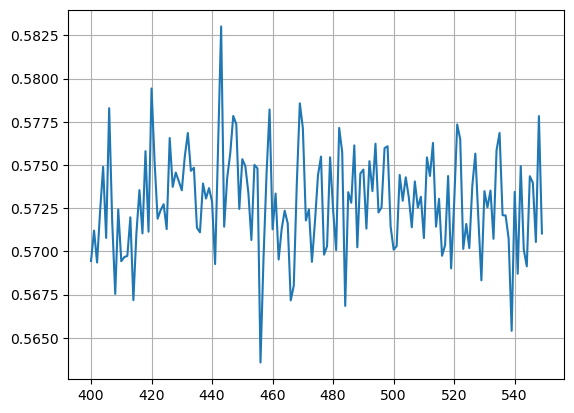

In [1441]:
# fig,ax = plt.figure()
plt.plot(range(400,550),silhouette_scores)
plt.grid(True)
plt.show()
# 406

In [1448]:
silhouette_scoress = []
for k in range(440,450):
    cluss = KMeans(n_clusters=k,random_state=42)
    cluss.fit(X_train[train_column])
    print("silhoutte_score: "+str(silhouette_score(X_train[train_column],cluss.labels_))+" number of clusters: "+str(k))
#     silhouette_scoress.append(silhouette_score(X_train[train_column],cluss.labels_))




silhoutte_score: 0.5728722766979668 number of clusters: 440
silhoutte_score: 0.5692631671125222 number of clusters: 441
silhoutte_score: 0.5761491228268596 number of clusters: 442
silhoutte_score: 0.5830175454787931 number of clusters: 443
silhoutte_score: 0.571428057114448 number of clusters: 444
silhoutte_score: 0.5742590288966238 number of clusters: 445
silhoutte_score: 0.5756611911562584 number of clusters: 446
silhoutte_score: 0.5778383759862277 number of clusters: 447
silhoutte_score: 0.577367885923043 number of clusters: 448
silhoutte_score: 0.5724556158538382 number of clusters: 449


In [1449]:
kmeans = KMeans(n_clusters=443,random_state=42)
kmeans.fit(X_train[train_column])

KMeans(n_clusters=443, random_state=42)

Code below takes input for song name and artist name and check spotify for the song, it returns multiple songs similar to your search and for each song we call two important functions ( get_track_analysis(token,ids) & get_track_features(token,ids) ), what these functions does is provide unique features about each song , we store it in a dataframe and remove the redundant features like we did earlier

In [1457]:
song_nameee = input('Name of song(case-sensitive): ')
artist_nameee = input('Name of artist(case-sensitive): ')

token = get_token()
s = search(token,song_nameee,artist_nameee)
your_info = []    
for i in s['tracks']['items']:
    for x in i['album']['artists']:
        analysis = get_track_analysis(token,i['id'])
        audio_feature = get_track_features(token,i['id'])

        instance_song = {'artist':x['name'],'artist_id':x['id'],'album_name':i['album']['name'],'track_name':i['name'],'album_id':i['album']['id'],'track_id':i['id']}
        try:
            instance_song.update(analysis['track'])
            instance_song.update(audio_feature)
        except:
            continue
        else:
            your_info.append(instance_song)

df1 = pd.DataFrame(your_info)
df1.rename(columns={'id':'track_id'},inplace=True)
df1.drop(columns=['uri','track_href','analysis_url','type','offset_seconds','window_seconds','sample_md5','analysis_sample_rate','analysis_channels','rhythm_version','rhythmstring','codestring','synch_version','synchstring','code_version','echoprint_version','echoprintstring'],inplace=True)

Name of song(case-sensitive): Spells
Name of artist(case-sensitive): Greentea Peng


In [1458]:
df1.head(5)

,artist,artist_id,album_name,track_name,album_id,track_id,num_samples,duration,end_of_fade_in,start_of_fade_out,...,mode_confidence,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,track_id,duration_ms
0,Greentea Peng,5z9wLR0RGBcWMXr4fCZW0K,Spells,Spells,1Nouj90219KOnJLwYDMWFu,1heKNMt0Ab3YtgCfOIjXcv,4053053,183.81194,0.00000,177.40045,...,0.963,0.736,0.510,0.0782,0.171,0.170000,0.1130,0.408,1heKNMt0Ab3YtgCfOIjXcv,183812
1,Greentea Peng,5z9wLR0RGBcWMXr4fCZW0K,Hu Man,Hu Man,1weDKnsUBvJMN9sdlaqC2W,2ZfVt2skRwfEq1Wb3D7GmP,4481442,203.24000,0.00000,195.36108,...,0.650,0.684,0.638,0.0585,0.393,0.000003,0.1030,0.692,2ZfVt2skRwfEq1Wb3D7GmP,203240
2,Greentea Peng,5z9wLR0RGBcWMXr4fCZW0K,Downers - A COLORS SHOW,Downers - A COLORS SHOW,7KYC0FGdUuEHYXJaqS4KTN,7qBnnlFavJKaDal2u40GOa,4851000,220.00000,0.09247,217.02531,...,0.544,0.682,0.394,0.1980,0.258,0.000000,0.0724,0.446,7qBnnlFavJKaDal2u40GOa,220000
3,Greentea Peng,5z9wLR0RGBcWMXr4fCZW0K,Revolution,Revolution,1e6ABIXpYwNkTzaaJ5SHD0,3FkhhQ3raWD4sMZBttYqzq,3399885,154.18980,0.00000,144.86930,...,0.463,0.703,0.693,0.1680,0.117,0.000304,0.0871,0.789,3FkhhQ3raWD4sMZBttYqzq,154190
4,Greentea Peng,5z9wLR0RGBcWMXr4fCZW0K,MAN MADE,Dingaling,55UAEClz8M595uaN2PeHpX,1rcIb8sfuxcOsCoLqVaQhw,4427640,200.80000,0.00000,197.60762,...,0.144,0.744,0.614,0.2160,0.444,0.000061,0.1970,0.655,1rcIb8sfuxcOsCoLqVaQhw,200800


We select a particular song we want to to predict what cluster the belong to

In [1459]:
kmeans.predict([df1[train_column].iloc[0]])

array([87], dtype=int32)

we now return songs in the cluster the particular song we searched for  belongs to

In [1460]:
X_train[kmeans.predict(X_train[train_column])==int(kmeans.predict([df1[train_column].iloc[1]]))]

,artist,artist_id,album_name,track_name,album_id,num_samples,duration,end_of_fade_in,start_of_fade_out,loudness,...,mode_confidence,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,track_id,duration_ms
1608,DaBaby,4r63FhuTkUYltbVAg5TQnk,Future Nostalgia,Levitating (feat. DaBaby),5lKlFlReHOLShQKyRv6AL9,4477565,203.06416,0.24372,199.43619,-3.787,...,0.220,0.702,0.825,0.0601,0.00883,0.000000,0.0674,0.915,5nujrmhLynf4yMoMtj8AQF,203064
1937,Greentea Peng,5z9wLR0RGBcWMXr4fCZW0K,Hu Man,Hu Man,1weDKnsUBvJMN9sdlaqC2W,4481442,203.24000,0.00000,195.36108,-8.279,...,0.650,0.684,0.638,0.0585,0.39300,0.000003,0.1030,0.692,2ZfVt2skRwfEq1Wb3D7GmP,203240
1798,CB,3yKIJWQ1SY3vzCTfBWAZ74,Beautiful And Brutal Yard,Cream (feat. CB),766bxryPZBL0hjz0KM6VUD,4476150,203.00000,0.07551,199.71483,-5.046,...,0.462,0.564,0.827,0.4370,0.02480,0.000000,0.3140,0.632,7viEq8U0GgZf3v5m4BON3c,203000
1260,5 Seconds of Summer,5Rl15oVamLq7FbSb0NNBNy,Youngblood (Deluxe),Youngblood,2D0Hi3Jj6RFnpWDcSa0Otu,4485364,203.41788,0.23800,200.55075,-5.114,...,0.317,0.596,0.854,0.4630,0.01690,0.000000,0.1240,0.152,2iUXsYOEPhVqEBwsqP70rE,203418
1514,J Hus,2a0uxJgbvvIRI4GX8pYfcr,Beautiful And Brutal Yard,Cream (feat. CB),766bxryPZBL0hjz0KM6VUD,4476150,203.00000,0.07551,199.71483,-5.046,...,0.462,0.564,0.827,0.4370,0.02480,0.000000,0.3140,0.632,7viEq8U0GgZf3v5m4BON3c,203000
250,Gucci Mane,13y7CgLHjMVRMDqxdx0Xdo,Evil Genius,Wake Up in the Sky,5xqQtdlJUY7Fg4BMp13LrX,4479703,203.16113,0.24376,198.95438,-5.144,...,0.332,0.800,0.578,0.0485,0.00381,0.000000,0.3670,0.367,2G1tXoGBaEMJ7FKGnkf6ud,203161
2179,Dua Lipa,6M2wZ9GZgrQXHCFfjv46we,Future Nostalgia,Levitating (feat. DaBaby),5lKlFlReHOLShQKyRv6AL9,4477565,203.06416,0.24372,199.43619,-3.787,...,0.220,0.702,0.825,0.0601,0.00883,0.000000,0.0674,0.915,5nujrmhLynf4yMoMtj8AQF,203064
192,DigDat,47rT8CoKTbr0S945AGgATQ,Ei8ht Mile,New Dior (feat. D-Block Europe),4C3UTxhLUXd9WiiKQpZ2FN,4478976,203.12816,0.00000,195.85450,-9.568,...,0.630,0.729,0.531,0.3710,0.45900,0.000000,0.0693,0.384,5YIUAdjnj180Fkqwf0J5X0,203128
1834,Sarah Vaughan,1bgyxtWjZwA5PQlDsvs9b8,Love Songs,Come Rain Or Come Shine,7N2FFVs2BMCwZeW8qutIbe,4484382,203.37334,0.21474,198.29842,-12.035,...,0.603,0.411,0.136,0.0359,0.98500,0.000000,0.1000,0.138,0goLt4LXK1MpzwIfmItIS1,203373
1594,Roy Woods,7mDU6nMUJnOSY2Hkjz5oqM,Mixed Emotions,Don't Love Me,4UADm8zx1jjPisT4Gnn0NJ,4482604,203.29270,0.00000,197.42186,-6.081,...,0.537,0.547,0.532,0.1420,0.25900,0.000000,0.1020,0.239,1PSttTRb9rCNJqpeMJZTxz,203293


In [ ]:
gau_silhouette_scores = []
for k in range(100,550):
    gm = GaussianMixture(n_components=200)
    gm.fit(X_train[train_column])
    gau_silhouette_scores.append(silhouette_score(X_train[train_column],gm.predict(X_train[train_column])))

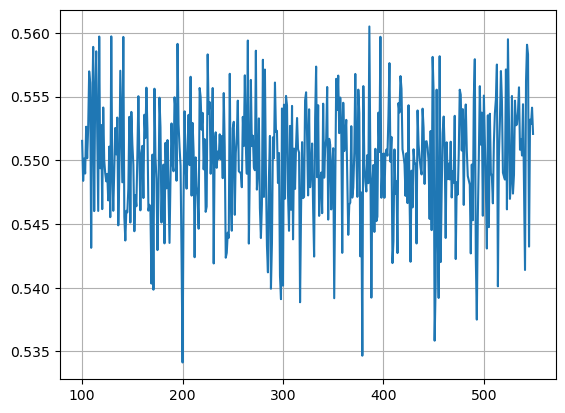

In [1413]:
plt.plot(range(100,550),gau_silhouette_scores)
plt.grid(True)
plt.show()